# Baseball All Stars and Salary (1985-2015)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt # plotting
import seaborn as sns #graphs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import tree
from matplotlib.pyplot import figure

In [2]:
#Importing data
#teamdf = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\EBGN525 - Business Analytics\Final Project\Data Files\OneDrive_2022-11-22\Original Data\team.csv')
allstardf = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\EBGN525 - Business Analytics\Final Project\Data Files\OneDrive_2022-11-22\Original Data\all_star2.csv')
salarydf =  pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\EBGN525 - Business Analytics\Final Project\Data Files\OneDrive_2022-11-22\Original Data\salary.csv')
#appearancesdf = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\EBGN525 - Business Analytics\Final Project\Data Files\OneDrive_2022-11-22\Original Data\appearances.csv')
battingdf = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\EBGN525 - Business Analytics\Final Project\Data Files\OneDrive_2022-11-22\Original Data\batting.csv')
pitchingdf = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\EBGN525 - Business Analytics\Final Project\Data Files\OneDrive_2022-11-22\Original Data\pitching.csv')
fieldingdf = pd.read_csv(r'C:\Users\thoma\Desktop\Colorado School of Mines\Fall 2022\EBGN525 - Business Analytics\Final Project\Data Files\OneDrive_2022-11-22\Original Data\fielding.csv')


# Cleaning / Assembling

In [3]:
allstardf['All_Star_Player'] = 1

In [4]:
df1 = pd.merge(salarydf, allstardf,  how = 'left', on = ['player_id', 'year'], suffixes = (None, 'yy')) #, right_on = 'year'
batterdf = pd.merge(df1, battingdf,  how = 'left', on = ['player_id', 'year'], suffixes = (None, 'yy')) #, right_on = 'year'
pitchingdf = pd.merge(df1, pitchingdf,  how = 'left', on = ['player_id', 'year'], suffixes = (None, 'yy')) #, right_on = 'year'
batterdf



,year,team_id,league_id,player_id,salary,game_num,game_id,team_idyy,league_idyy,gp,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,1985,ATL,NL,barkele01,870000,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1985,ATL,NL,bedrost01,550000,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,22.0,0.0,0.0,6.0,0.0,0.0
2,1985,ATL,NL,benedbr01,545000,NaN,NaN,NaN,NaN,NaN,...,20.0,0.0,1.0,22.0,12.0,1.0,1.0,4.0,2.0,8.0
3,1985,ATL,NL,campri01,633333,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0
4,1985,ATL,NL,ceronri01,625000,NaN,NaN,NaN,NaN,NaN,...,25.0,0.0,3.0,29.0,25.0,1.0,1.0,0.0,4.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28172,2015,WAS,NL,treinbl01,512800,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
28173,2015,WAS,NL,ugglada01,507500,NaN,NaN,NaN,NaN,NaN,...,16.0,0.0,1.0,19.0,40.0,0.0,1.0,0.0,1.0,3.0
28174,2015,WAS,NL,werthja01,21000000,NaN,NaN,NaN,NaN,NaN,...,42.0,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0
28175,2015,WAS,NL,zimmejo02,16500000,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,0.0,0.0,18.0,0.0,0.0,6.0,0.0,0.0


In [5]:
pitchingdf

,year,team_id,league_id,player_id,salary,game_num,game_id,team_idyy,league_idyy,gp,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,1985,ATL,NL,barkele01,870000,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,1.0,0.0,335.0,1.0,55.0,NaN,NaN,NaN
1,1985,ATL,NL,bedrost01,550000,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,5.0,0.0,907.0,0.0,101.0,NaN,NaN,NaN
2,1985,ATL,NL,benedbr01,545000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,ATL,NL,campri01,633333,NaN,NaN,NaN,NaN,NaN,...,11.0,4.0,5.0,0.0,569.0,23.0,72.0,NaN,NaN,NaN
4,1985,ATL,NL,ceronri01,625000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26840,2015,WAS,NL,treinbl01,512800,NaN,NaN,NaN,NaN,NaN,...,6.0,4.0,2.0,0.0,280.0,17.0,32.0,1.0,1.0,NaN
26841,2015,WAS,NL,ugglada01,507500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26842,2015,WAS,NL,werthja01,21000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26843,2015,WAS,NL,zimmejo02,16500000,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,8.0,1.0,831.0,0.0,89.0,8.0,2.0,NaN


In [6]:
#df1a = pd.merge(salarydf, allstardf,  how = 'left', on = ['player_id', 'year'], copy = False) #, right_on = 'year'
#df1 = pd.merge(salarydf, allstardf,  how = 'left', on = ['player_id', 'year']) #, right_on = 'year'
#df2 = pd.merge(df1, battingdf,  how = 'left', on = ['player_id', 'year'], suffixes = (None, 'yy')) #, right_on = 'year'
#df2a = pd.merge(df1, battingdf,  how = 'left', on = ['player_id', 'year']) #, right_on = 'year'
#df = pd.merge(df2, pitchingdf,  how = 'left', on = ['player_id', 'year'], suffixes = (None, 'yy')) #, right_on = 'year'
#df = pd.merge(df3, fieldingdf,  how = 'left', on = ['player_id', 'year'], suffixes = (None, 'yy')) #, right_on = 'year'

In [7]:
repeatedcolumns = []
for col in pitchingdf.columns:
    if 'yy' in col:
        repeatedcolumns.append(col)
pitchingdf = pitchingdf.drop(repeatedcolumns, axis = 1)
pitchingdf

repeatedcolumns = []
for col in batterdf.columns:
    if 'yy' in col:
        repeatedcolumns.append(col)
batterdf = batterdf.drop(repeatedcolumns, axis = 1)
batterdf

#fill in non all-stars
batterdf['All_Star_Player'] = batterdf['All_Star_Player'].fillna(0)
pitchingdf['All_Star_Player'] = pitchingdf['All_Star_Player'].fillna(0)


In [8]:
#repeatedcolumns = []
#for col in df.columns:
#    if 'yy' in col:
#        repeatedcolumns.append(col)
#df = df.drop(repeatedcolumns, axis = 1)
#df
#batterdf.info()

batterdf['All_Star_Player'] = batterdf['All_Star_Player'].astype('category')
pitchingdf['All_Star_Player'] = pitchingdf['All_Star_Player'].astype('category')
batterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28177 entries, 0 to 28176
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             28177 non-null  int64   
 1   team_id          28177 non-null  object  
 2   league_id        28177 non-null  object  
 3   player_id        28177 non-null  object  
 4   salary           28177 non-null  int64   
 5   game_num         2073 non-null   float64 
 6   game_id          2073 non-null   object  
 7   gp               2053 non-null   float64 
 8   starting_pos     596 non-null    float64 
 9   Unnamed: 8       0 non-null      float64 
 10  Unnamed: 9       0 non-null      object  
 11  Unnamed: 10      0 non-null      object  
 12  All_Star_Player  28177 non-null  category
 13  stint            27385 non-null  float64 
 14  g                27385 non-null  float64 
 15  ab               25240 non-null  float64 
 16  r                25240 non-null  float64

In [9]:
batterdf = batterdf.dropna(subset = 'h')
batterdf = batterdf.dropna(axis='columns', thresh = 2000)

pitchingdf = pitchingdf.dropna(subset = 'era')
pitchingdf = pitchingdf.dropna(axis='columns', thresh = 7000)
pitchingdf = pitchingdf.drop('baopp', axis= 1)
pitchingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12884 entries, 0 to 26843
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             12884 non-null  int64   
 1   team_id          12884 non-null  object  
 2   league_id        12884 non-null  object  
 3   player_id        12884 non-null  object  
 4   salary           12884 non-null  int64   
 5   All_Star_Player  12884 non-null  category
 6   stint            12884 non-null  float64 
 7   w                12884 non-null  float64 
 8   l                12884 non-null  float64 
 9   g                12884 non-null  float64 
 10  gs               12884 non-null  float64 
 11  cg               12884 non-null  float64 
 12  sho              12884 non-null  float64 
 13  sv               12884 non-null  float64 
 14  ipouts           12884 non-null  float64 
 15  h                12884 non-null  float64 
 16  er               12884 non-null  float64

In [10]:
categorical_columns = ['team_id', 'league_id']
batterdf = pd.concat([batterdf, pd.get_dummies(batterdf[categorical_columns])], axis=1);
pitchingdf = pd.concat([pitchingdf, pd.get_dummies(pitchingdf[categorical_columns])], axis=1);

batterdf = batterdf.drop(columns = categorical_columns, axis = 1)
pitchingdf = pitchingdf.drop(columns = categorical_columns, axis = 1); pitchingdf

,year,player_id,salary,All_Star_Player,stint,w,l,g,gs,cg,...,team_id_SDN,team_id_SEA,team_id_SFN,team_id_SLN,team_id_TBA,team_id_TEX,team_id_TOR,team_id_WAS,league_id_AL,league_id_NL
0,1985,barkele01,870000,0.0,1.0,2.0,9.0,20.0,18.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,1985,bedrost01,550000,0.0,1.0,7.0,15.0,37.0,37.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,1985,campri01,633333,0.0,1.0,4.0,6.0,66.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6,1985,dedmoje01,150000,0.0,1.0,6.0,3.0,60.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
7,1985,forstte01,483333,0.0,1.0,2.0,3.0,46.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26836,2015,storedr01,5700000,0.0,1.0,2.0,2.0,58.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
26837,2015,strasst01,7400000,0.0,1.0,11.0,7.0,23.0,23.0,0.0,...,0,0,0,0,0,0,0,1,0,1
26839,2015,thornma01,3500000,0.0,1.0,2.0,1.0,60.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
26840,2015,treinbl01,512800,0.0,1.0,2.0,5.0,60.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1


In [11]:
#missingdata = Xpa.isnull().sum(axis=0).reset_index()
#missingdata.columns = ['Column_Name', 'Number_of_Missing_Values']
#missingdata = missingdata.sort_values(by = 'Number_of_Missing_Values')
#missingdata = missingdata[missingdata['Number_of_Missing_Values']>0]

#f, ax = plt.subplots(figsize=(6, 10))
#sns.set_color_codes("pastel")
#sns.barplot(x="Number_of_Missing_Values", y="Column_Name", data=missingdata)

In [12]:
Xbs = batterdf.drop(['player_id', 'salary'], axis = 1)
Xba = batterdf.drop(['player_id', 'All_Star_Player'], axis = 1)
Xps = pitchingdf.drop(['player_id', 'salary'], axis = 1)
Xpa = pitchingdf.drop(['player_id', 'All_Star_Player'], axis = 1)

ybs = batterdf['salary']
yba = batterdf['All_Star_Player']
yps = pitchingdf['salary']
ypa = pitchingdf['All_Star_Player']

In [13]:
#create our training and test sets
xbs_train, xbs_test, ybs_train, ybs_test = train_test_split(Xbs, ybs, test_size = 0.2, random_state = 0)
xba_train, xba_test, yba_train, yba_test = train_test_split(Xba, yba, test_size = 0.2, random_state = 0)
xps_train, xps_test, yps_train, yps_test = train_test_split(Xps, yps, test_size = 0.2, random_state = 0)
xpa_train, xpa_test, ypa_train, ypa_test = train_test_split(Xpa, ypa, test_size = 0.2, random_state = 0)

# Models

To predict All Star non-pitchers, I trained a RFC model and reached a mean test accuracy score of 0.9352218700475435, the mean train accuracy score was 0.9331418383518225
[[4651   24]
 [ 303   70]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      4675
         1.0       0.74      0.19      0.30       373

    accuracy                           0.94      5048
   macro avg       0.84      0.59      0.63      5048
weighted avg       0.92      0.94      0.92      5048

To predict All Star pitchers, I trained a RFC model and reached a mean test accuracy score of 0.9557625145518044, the mean train accuracy score was 0.9573105656350054
[[2432    3]
 [ 111   31]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2435
         1.0       0.91      0.22      0.35       142

    accuracy                           0.96      2577
   macro avg       0.93      0.61      0.66      2577
weighted 

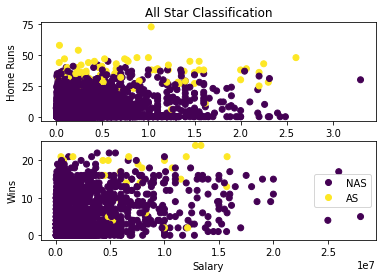

In [14]:
#Classification Model All Star Batters
rfc =  RandomForestClassifier(max_depth=5, random_state = 0)
rfc.fit(xba_train, yba_train)
ybapredrfc =  rfc.predict(xba_test)
print(f'To predict All Star non-pitchers, I trained a RFC model and reached a mean test accuracy score of {rfc.score(xba_test, yba_test)}, the mean train accuracy score was {rfc.score(xba_train,yba_train)}')

print(confusion_matrix(yba_test, ybapredrfc)) #confusion matrix
print(classification_report(yba_test, ybapredrfc)) #classification report

plt.subplot(2,1,1)
cluster_labels = ybapredrfc
scatter = plt.scatter(x='salary', y='hr', data=xba_test, c = cluster_labels)
plt.xlabel('Salary')
plt.ylabel('Home Runs')
plt.title('All Star Classification')



#Classification model all star pitchers
rfc2 =  RandomForestClassifier(max_depth=5, random_state = 0)
rfc2.fit(xpa_train, ypa_train)
ypapredrfc =  rfc2.predict(xpa_test)
print(f'To predict All Star pitchers, I trained a RFC model and reached a mean test accuracy score of {rfc2.score(xpa_test,ypa_test)}, the mean train accuracy score was {rfc2.score(xpa_train,ypa_train)}')

print(confusion_matrix(ypa_test, ypapredrfc)) #confusion matrix
print(classification_report(ypa_test, ypapredrfc)) #classification report

plt.subplot(2,1,2)
cluster_labels = ypapredrfc
plt.scatter(x='salary', y='w', data=xpa_test, c = cluster_labels)
plt.xlabel('Salary')
plt.ylabel('Wins')
plt.legend(handles=scatter.legend_elements()[0], 
           labels = ['NAS', 'AS']
           #title="Classification"
          )


[Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature'),
 Text(0.5, 1.0, 'Batter All Star Model Feature Importance')]

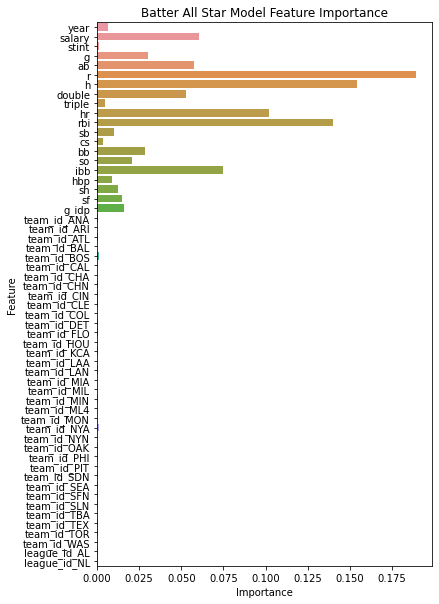

In [15]:
rf1coeffeaturemags = []
rf1featurenames = []
for feature, coef in zip(xba_train.columns, rfc.feature_importances_):
    #print(f"The magniture of the feature coefficient for {feature} is {abs(coef)}.")
    rf1coeffeaturemags.append(abs(coef))
    rf1featurenames.append(feature)
f, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes("pastel")
sns.barplot(x= rf1coeffeaturemags, y = rf1featurenames).set(xlabel = 'Importance', ylabel = 'Feature', title = 'Batter All Star Model Feature Importance')

[Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature'),
 Text(0.5, 1.0, 'Pitcher All Star Model Feature Importance')]

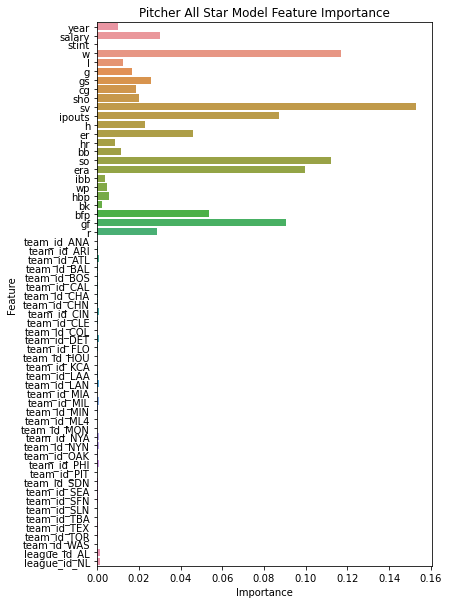

In [16]:
rf2coeffeaturemags = []
rf2featurenames = []
for feature, coef in zip(xpa_train.columns, rfc2.feature_importances_):
    #print(f"The magniture of the feature coefficient for {feature} is {abs(coef)}.")
    rf2coeffeaturemags.append(abs(coef))
    rf2featurenames.append(feature)
f, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes("pastel")
sns.barplot(x= rf2coeffeaturemags, y = rf2featurenames).set(xlabel = 'Importance', ylabel = 'Feature', title = 'Pitcher All Star Model Feature Importance')

In [31]:
#Regressopm Model All Star Batters
rfr =  RandomForestRegressor(random_state = 0)
rfr.fit(xbs_train, ybs_train)
ybspredrfr =  rfr.predict(xbs_test)
rs1 = r2_score(ybs_test, ybspredrfr)
ybspredrfrtrain =  rfr.predict(xbs_train)
rs1a = r2_score(ybs_train, ybspredrfrtrain)
print(f'To predict Salaries for non-pitchers, I trained a RFR model and reached a training R^2 value of {rs1a}')
print(f'To predict Salaries for non-pitchers, I trained a RFR model and reached a test R^2 value of {rs1}')


rfr2 =  RandomForestRegressor(random_state = 0)
rfr2.fit(xps_train, yps_train)
ypspredrfr =  rfr2.predict(xps_test)
ypspredrfrtrain =  rfr2.predict(xps_train)
rs2a = r2_score(yps_train, ypspredrfrtrain)
rs2 = r2_score(yps_test, ypspredrfr)

print(f'To predict salaries for pitchers, I trained a RFC model and reached a training R^2 value of {rs2a}')
print(f'To predict salaries for pitchers, I trained a RFC model and reached a test R^2 value of {rs2}')

To predict Salaries for non-pitchers, I trained a RFR model and reached a training R^2 value of 0.9097472133550782
To predict Salaries for non-pitchers, I trained a RFR model and reached a test R^2 value of 0.4070275282234228
To predict salaries for pitchers, I trained a RFC model and reached a training R^2 value of 0.9150467638807235
To predict salaries for pitchers, I trained a RFC model and reached a test R^2 value of 0.3737702830013073


[Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature'),
 Text(0.5, 1.0, 'Batter Salary Model Feature Importance')]

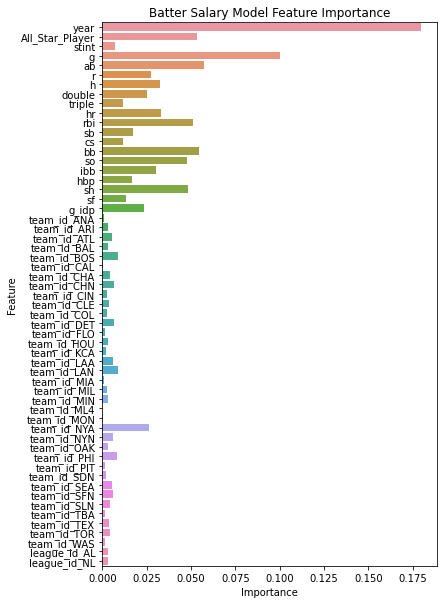

In [18]:
rfr1coeffeaturemags = []
rfr1featurenames = []
for feature, coef in zip(xbs_train.columns, rfr.feature_importances_):
    #print(f"The magniture of the feature coefficient for {feature} is {abs(coef)}.")
    rfr1coeffeaturemags.append(abs(coef))
    rfr1featurenames.append(feature)
f, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes("pastel")
sns.barplot(x= rfr1coeffeaturemags, y = rfr1featurenames).set(xlabel = 'Importance', ylabel = 'Feature', title = 'Batter Salary Model Feature Importance')

[Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature'),
 Text(0.5, 1.0, 'Pitcher Salary Model Feature Importance')]

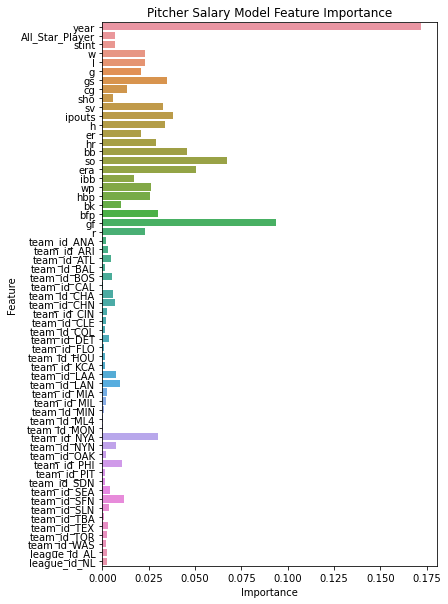

In [19]:
rfr2coeffeaturemags = []
rfr2featurenames = []
for feature, coef in zip(xps_train.columns, rfr2.feature_importances_):
    #print(f"The magniture of the feature coefficient for {feature} is {abs(coef)}.")
    rfr2coeffeaturemags.append(abs(coef))
    rfr2featurenames.append(feature)
f, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes("pastel")
sns.barplot(x= rfr2coeffeaturemags, y = rfr2featurenames).set(xlabel = 'Importance', ylabel = 'Feature', title = 'Pitcher Salary Model Feature Importance')

In [35]:
agreatbatter = xba_test.iloc[0].copy()
abadbatter = xba_test.iloc[1].copy()

agreatbatter['year', 'salary', 'stint', 'g', 'ab', 'r', 'h', 'double',
       'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf',
       'g_idp', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL', 'team_id_BAL',
       'team_id_BOS', 'team_id_CAL', 'team_id_CHA', 'team_id_CHN',
       'team_id_CIN', 'team_id_CLE', 'team_id_COL', 'team_id_DET',
       'team_id_FLO', 'team_id_HOU', 'team_id_KCA', 'team_id_LAA',
       'team_id_LAN', 'team_id_MIA', 'team_id_MIL', 'team_id_MIN',
       'team_id_ML4', 'team_id_MON', 'team_id_NYA', 'team_id_NYN',
       'team_id_OAK', 'team_id_PHI', 'team_id_PIT', 'team_id_SDN',
       'team_id_SEA', 'team_id_SFN', 'team_id_SLN', 'team_id_TBA',
       'team_id_TEX', 'team_id_TOR', 'team_id_WAS', 'league_id_AL',
       'league_id_NL'] = [2015, 11000000, 1, 163, 650, 120, 220, 50, 15, 70, 150, 90, 0, 160, 10, 140, 10, 10, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
abadbatter['year', 'salary', 'stint', 'g', 'ab', 'r', 'h', 'double',
       'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf',
       'g_idp', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL', 'team_id_BAL',
       'team_id_BOS', 'team_id_CAL', 'team_id_CHA', 'team_id_CHN',
       'team_id_CIN', 'team_id_CLE', 'team_id_COL', 'team_id_DET',
       'team_id_FLO', 'team_id_HOU', 'team_id_KCA', 'team_id_LAA',
       'team_id_LAN', 'team_id_MIA', 'team_id_MIL', 'team_id_MIN',
       'team_id_ML4', 'team_id_MON', 'team_id_NYA', 'team_id_NYN',
       'team_id_OAK', 'team_id_PHI', 'team_id_PIT', 'team_id_SDN',
       'team_id_SEA', 'team_id_SFN', 'team_id_SLN', 'team_id_TBA',
       'team_id_TEX', 'team_id_TOR', 'team_id_WAS', 'league_id_AL',
       'league_id_NL'] = [2015, 5000000, 1, 100, 400, 5, 10, 5, 1, 10, 15, 1, 20, 1, 150, 1, 10, 15, 15, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

abatters = [agreatbatter, abadbatter]
abattersdf = pd.DataFrame.from_records(abatters)
if rfc.predict(abattersdf)[0] == 1:
    print('Our model predicts that our great batter will be an all star!')
else:
    print('Our model predicts that our great batter will not be an all star.')
if rfc.predict(abattersdf)[1] == 1:
    print('Our model predicts that our bad batter will be an all star! Uh oh.')
else:
    print('Our model predicts that our bad batter will not be an all star.')

    
#print(f'Our model predicts that our great batter will be paid ${rfc.predict(abattersdf)[0]}')
#print(f'Our model predicts that our bad batter will be paid ${rfc.predict(abattersdf)[1]}')
abattersdf

Our model predicts that our great batter will be an all star!
Our model predicts that our bad batter will not be an all star.


,year,salary,stint,g,ab,r,h,double,triple,hr,...,team_id_SDN,team_id_SEA,team_id_SFN,team_id_SLN,team_id_TBA,team_id_TEX,team_id_TOR,team_id_WAS,league_id_AL,league_id_NL
0,2015.0,11000000.0,1.0,163.0,650.0,120.0,220.0,50.0,15.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015.0,5000000.0,1.0,100.0,400.0,5.0,10.0,5.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
agreatpitcher = xpa_test.iloc[0].copy()
abadpitcher = xpa_test.iloc[1].copy()
greatpitchernumbers = [2015, 20000000, 1, 32, 0, 32, 32, 32, 32, 10, 600, 1, 1,   1,     1, 300, 0, 1, 1, 1, 1, 600, 32, 1, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1]
badpitchernumbers = [   1985, 500000, 1, 2, 18, 20, 20,  2,  0,  0, 3,1000, 10, 100, 1000, 3, 100, 10, 10, 10, 10, 10, 10, 100, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1]
agreatpitcher['year', 'salary', 'stint', 'w', 'l', 'g', 'gs', 'cg', 'sho', 'sv',
       'ipouts', 'h', 'er', 'hr', 'bb', 'so', 'era', 'ibb', 'wp', 'hbp', 'bk',
       'bfp', 'gf', 'r', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL',
       'team_id_BAL', 'team_id_BOS', 'team_id_CAL', 'team_id_CHA',
       'team_id_CHN', 'team_id_CIN', 'team_id_CLE', 'team_id_COL',
       'team_id_DET', 'team_id_FLO', 'team_id_HOU', 'team_id_KCA',
       'team_id_LAA', 'team_id_LAN', 'team_id_MIA', 'team_id_MIL',
       'team_id_MIN', 'team_id_ML4', 'team_id_MON', 'team_id_NYA',
       'team_id_NYN', 'team_id_OAK', 'team_id_PHI', 'team_id_PIT',
       'team_id_SDN', 'team_id_SEA', 'team_id_SFN', 'team_id_SLN',
       'team_id_TBA', 'team_id_TEX', 'team_id_TOR', 'team_id_WAS',
       'league_id_AL', 'league_id_NL'] = greatpitchernumbers
abadpitcher['year', 'salary', 'stint', 'w', 'l', 'g', 'gs', 'cg', 'sho', 'sv',
       'ipouts', 'h', 'er', 'hr', 'bb', 'so', 'era', 'ibb', 'wp', 'hbp', 'bk',
       'bfp', 'gf', 'r', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL',
       'team_id_BAL', 'team_id_BOS', 'team_id_CAL', 'team_id_CHA',
       'team_id_CHN', 'team_id_CIN', 'team_id_CLE', 'team_id_COL',
       'team_id_DET', 'team_id_FLO', 'team_id_HOU', 'team_id_KCA',
       'team_id_LAA', 'team_id_LAN', 'team_id_MIA', 'team_id_MIL',
       'team_id_MIN', 'team_id_ML4', 'team_id_MON', 'team_id_NYA',
       'team_id_NYN', 'team_id_OAK', 'team_id_PHI', 'team_id_PIT',
       'team_id_SDN', 'team_id_SEA', 'team_id_SFN', 'team_id_SLN',
       'team_id_TBA', 'team_id_TEX', 'team_id_TOR', 'team_id_WAS',
       'league_id_AL', 'league_id_NL'] = badpitchernumbers
apitchers = [agreatpitcher, abadpitcher]
apitchersdf = pd.DataFrame.from_records(apitchers)
if rfc2.predict(apitchersdf)[0] == 1:
    print('Our model predicts that our great pitcher will be an all star!')
else:
    print('Our model predicts that our great pitcher will not be an all star.  Uh oh.')
if rfc2.predict(apitchersdf)[1] == 1:
    print('Our model predicts that our bad pitcher will be an all star! Uh oh.')
else:
    print('Our model predicts that our bad pitcher will not be an all star.')
apitchersdf

Our model predicts that our great pitcher will be an all star!
Our model predicts that our bad pitcher will not be an all star.


,year,salary,stint,w,l,g,gs,cg,sho,sv,...,team_id_SDN,team_id_SEA,team_id_SFN,team_id_SLN,team_id_TBA,team_id_TEX,team_id_TOR,team_id_WAS,league_id_AL,league_id_NL
0,2015.0,20000000.0,1.0,32.0,0.0,32.0,32.0,32.0,32.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1985.0,500000.0,1.0,2.0,18.0,20.0,20.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
sgreatbatter = xbs_test.iloc[0].copy()
sbadbatter = xbs_test.iloc[1].copy()
sgreatpitchernumbers = [2015, 20000000, 1, 32, 0, 32, 32, 32, 32, 10, 600, 1, 1,   1,     1, 300, 0, 1, 1, 1, 1, 600, 32, 1, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1]
sbadpitchernumbers = [   2015, 500000, 1, 2, 18, 20, 20,  2,  0,  0, 3,1000, 10, 100, 1000, 3, 100, 10, 10, 10, 10, 10, 10, 100, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1]



sgreatbatter['year', 'All_Star_Player', 'stint', 'g', 'ab', 'r', 'h', 'double',
       'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf',
       'g_idp', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL', 'team_id_BAL',
       'team_id_BOS', 'team_id_CAL', 'team_id_CHA', 'team_id_CHN',
       'team_id_CIN', 'team_id_CLE', 'team_id_COL', 'team_id_DET',
       'team_id_FLO', 'team_id_HOU', 'team_id_KCA', 'team_id_LAA',
       'team_id_LAN', 'team_id_MIA', 'team_id_MIL', 'team_id_MIN',
       'team_id_ML4', 'team_id_MON', 'team_id_NYA', 'team_id_NYN',
       'team_id_OAK', 'team_id_PHI', 'team_id_PIT', 'team_id_SDN',
       'team_id_SEA', 'team_id_SFN', 'team_id_SLN', 'team_id_TBA',
       'team_id_TEX', 'team_id_TOR', 'team_id_WAS', 'league_id_AL',
       'league_id_NL'] = [2015, 1, 1, 163, 650, 120, 220, 50, 15, 70, 150, 90, 0, 160, 10, 140, 10, 10, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sbadbatter['year', 'All_Star_Player', 'stint', 'g', 'ab', 'r', 'h', 'double',
       'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf',
       'g_idp', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL', 'team_id_BAL',
       'team_id_BOS', 'team_id_CAL', 'team_id_CHA', 'team_id_CHN',
       'team_id_CIN', 'team_id_CLE', 'team_id_COL', 'team_id_DET',
       'team_id_FLO', 'team_id_HOU', 'team_id_KCA', 'team_id_LAA',
       'team_id_LAN', 'team_id_MIA', 'team_id_MIL', 'team_id_MIN',
       'team_id_ML4', 'team_id_MON', 'team_id_NYA', 'team_id_NYN',
       'team_id_OAK', 'team_id_PHI', 'team_id_PIT', 'team_id_SDN',
       'team_id_SEA', 'team_id_SFN', 'team_id_SLN', 'team_id_TBA',
       'team_id_TEX', 'team_id_TOR', 'team_id_WAS', 'league_id_AL',
       'league_id_NL'] = [2015, 1, 1, 100, 400, 5, 10, 5, 1, 10, 15, 1, 20, 1, 150, 1, 10, 15, 15, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

sbatters = [sgreatbatter, sbadbatter]
sbattersdf = pd.DataFrame.from_records(sbatters)
print(f'Our model predicts that our great batter will be paid ${rfr.predict(sbattersdf)[0]}')
print(f'Our model predicts that our bad batter will be paid ${rfr.predict(sbattersdf)[1]}')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #
    sbattersdf


Our model predicts that our great batter will be paid $11980968.18
Our model predicts that our bad batter will be paid $7236464.79


,year,All_Star_Player,stint,g,ab,r,h,double,triple,hr,...,team_id_SDN,team_id_SEA,team_id_SFN,team_id_SLN,team_id_TBA,team_id_TEX,team_id_TOR,team_id_WAS,league_id_AL,league_id_NL
0,2015.0,1.0,1.0,163.0,650.0,120.0,220.0,50.0,15.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015.0,1.0,1.0,100.0,400.0,5.0,10.0,5.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
len(sgreatpitchernumbers)
len(xps_test.columns)

61

In [24]:
sgreatpitcher = xps_test.iloc[0].copy()
xps_test

,year,All_Star_Player,stint,w,l,g,gs,cg,sho,sv,...,team_id_SDN,team_id_SEA,team_id_SFN,team_id_SLN,team_id_TBA,team_id_TEX,team_id_TOR,team_id_WAS,league_id_AL,league_id_NL
20396,2008,0.0,2.0,1.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
18053,2005,0.0,1.0,4.0,6.0,52.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
14339,2001,0.0,1.0,6.0,2.0,58.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
16695,2004,0.0,1.0,15.0,8.0,34.0,34.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
26774,2015,0.0,1.0,1.0,0.0,11.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,1991,0.0,2.0,1.0,0.0,10.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
11892,1999,0.0,1.0,10.0,1.0,73.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
7642,1994,0.0,1.0,2.0,5.0,47.0,0.0,0.0,0.0,5.0,...,0,0,0,0,0,1,0,0,1,0
6777,1993,1.0,1.0,19.0,9.0,34.0,32.0,3.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
listofcolumns = ['year', 'All_Star_Player', 'stint', 'w', 'l', 'g', 'gs', 'cg', 'sho', 'sv',
       'ipouts', 'h', 'er', 'hr', 'bb', 'so', 'era', 'ibb', 'wp', 'hbp', 'bk',
       'bfp', 'gf', 'r', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL',
       'team_id_BAL', 'team_id_BOS', 'team_id_CAL', 'team_id_CHA',
       'team_id_CHN', 'team_id_CIN', 'team_id_CLE', 'team_id_COL',
       'team_id_DET', 'team_id_FLO', 'team_id_HOU', 'team_id_KCA',
       'team_id_LAA', 'team_id_LAN', 'team_id_MIA', 'team_id_MIL',
       'team_id_MIN', 'team_id_ML4', 'team_id_MON', 'team_id_NYA',
       'team_id_NYN', 'team_id_OAK', 'team_id_PHI', 'team_id_PIT',
       'team_id_SDN', 'team_id_SEA', 'team_id_SFN', 'team_id_SLN',
       'team_id_TBA', 'team_id_TEX', 'team_id_TOR', 'team_id_WAS',
       'league_id_AL', 'league_id_NL']

In [43]:
sgreatpitcher = xps_test.iloc[0].copy()
sbadpitcher = xps_test.iloc[1].copy()
sgreatpitchernumbers = [2015, 1, 1, 32, 0, 32, 32, 32, 32, 10, 600, 1, 1,   1,     1, 300, 0, 1, 1, 1, 1, 600, 32, 1, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
sbadpitchernumbers = [  1985, 0, 1, 2, 18, 20, 20,  2,  0,  0, 3,1000, 10, 100, 1000, 3, 100, 10, 10, 10, 10, 10, 10, 100, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1]
sgreatpitcher['year', 'All_Star_Player', 'stint', 'w', 'l', 'g', 'gs', 'cg', 'sho', 'sv',
       'ipouts', 'h', 'er', 'hr', 'bb', 'so', 'era', 'ibb', 'wp', 'hbp', 'bk',
       'bfp', 'gf', 'r', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL',
       'team_id_BAL', 'team_id_BOS', 'team_id_CAL', 'team_id_CHA',
       'team_id_CHN', 'team_id_CIN', 'team_id_CLE', 'team_id_COL',
       'team_id_DET', 'team_id_FLO', 'team_id_HOU', 'team_id_KCA',
       'team_id_LAA', 'team_id_LAN', 'team_id_MIA', 'team_id_MIL',
       'team_id_MIN', 'team_id_ML4', 'team_id_MON', 'team_id_NYA',
       'team_id_NYN', 'team_id_OAK', 'team_id_PHI', 'team_id_PIT',
       'team_id_SDN', 'team_id_SEA', 'team_id_SFN', 'team_id_SLN',
       'team_id_TBA', 'team_id_TEX', 'team_id_TOR', 'team_id_WAS',
       'league_id_AL', 'league_id_NL'] = sgreatpitchernumbers
sgreatpitcher['team_id_NYA']=1
sbadpitcher['year', 'All_Star_Player', 'stint', 'w', 'l', 'g', 'gs', 'cg', 'sho', 'sv',
       'ipouts', 'h', 'er', 'hr', 'bb', 'so', 'era', 'ibb', 'wp', 'hbp', 'bk',
       'bfp', 'gf', 'r', 'team_id_ANA', 'team_id_ARI', 'team_id_ATL',
       'team_id_BAL', 'team_id_BOS', 'team_id_CAL', 'team_id_CHA',
       'team_id_CHN', 'team_id_CIN', 'team_id_CLE', 'team_id_COL',
       'team_id_DET', 'team_id_FLO', 'team_id_HOU', 'team_id_KCA',
       'team_id_LAA', 'team_id_LAN', 'team_id_MIA', 'team_id_MIL',
       'team_id_MIN', 'team_id_ML4', 'team_id_MON', 'team_id_NYA',
       'team_id_NYN', 'team_id_OAK', 'team_id_PHI', 'team_id_PIT',
       'team_id_SDN', 'team_id_SEA', 'team_id_SFN', 'team_id_SLN',
       'team_id_TBA', 'team_id_TEX', 'team_id_TOR', 'team_id_WAS',
       'league_id_AL', 'league_id_NL'] = sbadpitchernumbers
spitchers = [sgreatpitcher, sbadpitcher]
spitchersdf = pd.DataFrame.from_records(spitchers)

print(f'Our model predicts that our great pitcher will be paid ${rfr2.predict(spitchersdf)[0]}')
print(f'Our model predicts that our bad pitcher will be paid ${rfr2.predict(spitchersdf)[1]}')

spitchersdf

Our model predicts that our great pitcher will be paid $9555275.66
Our model predicts that our bad pitcher will be paid $1131121.74


,year,All_Star_Player,stint,w,l,g,gs,cg,sho,sv,...,team_id_SDN,team_id_SEA,team_id_SFN,team_id_SLN,team_id_TBA,team_id_TEX,team_id_TOR,team_id_WAS,league_id_AL,league_id_NL
0,2015.0,1.0,1.0,32.0,0.0,32.0,32.0,32.0,32.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1985.0,0.0,1.0,2.0,18.0,20.0,20.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


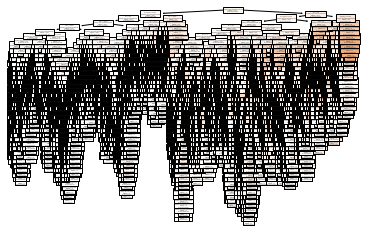

<Figure size 2880x2880 with 0 Axes>

In [27]:
#_ = tree.plot_tree(RFmodel.estimators_[0], feature_names=X_train.columns, filled=True, ax = (10,10))
tree.plot_tree(rfr.estimators_[0], feature_names=xbs_train.columns, filled=True)
fig = plt.figure(figsize=(40, 40))
fig.savefig('test6png.png', dpi=100)